In [37]:
import pandas as pd

In [38]:
adult = pd.read_csv('./datasets/chapter_5/adult.data', header=None, names=["Age", "Work-Class", "fnlwgt", "Education", "Education-Num", "Marital-Status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-Country", "Earnings-Raw"])

In [39]:
adult.dropna(how='all', inplace=True)
adult['Hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours-per-week, dtype: float64

In [40]:
adult['Education-Num'].median()

10.0

/Users/spicy.kev/anaconda3/envs/nlp/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/spicy.kev/anaconda3/envs/nlp/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/spicy.kev/anaconda3/envs/nlp/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/spicy.kev/anaconda3/envs/nlp/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/spicy.kev/ana

<AxesSubplot:xlabel='Education-Num', ylabel='Hours-per-week'>

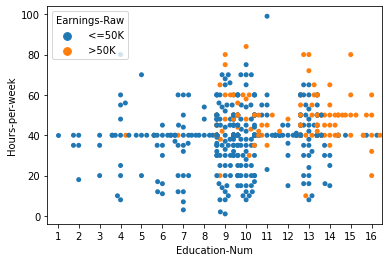

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.swarmplot(x="Education-Num", y="Hours-per-week", hue="Earnings-Raw", data=adult[::50])

In [43]:
adult["LongHours"] = adult['Hours-per-week'] > 40

In [44]:
import numpy as np 
X = np.arange(30).reshape((10, 3))

In [45]:
X[:, 1] = 1

In [46]:
from sklearn.feature_selection import VarianceThreshold 
vt = VarianceThreshold() 
Xt = vt.fit_transform(X)

In [47]:
print(vt.variances_)

[27.  0. 27.]


In [48]:
X = adult[["Age", "Education-Num", "Capital-gain", "Capital-loss", "Hours-per-week"]].values

In [49]:
y = (adult["Earnings-Raw"] == ' >50K').values

In [50]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
transformer = SelectKBest(score_func=chi2, k=3)
Xt_chi2 = transformer.fit_transform(X, y)

In [51]:
Xt_chi2

array([[   39,  2174,     0],
       [   50,     0,     0],
       [   38,     0,     0],
       ...,
       [   58,     0,     0],
       [   22,     0,     0],
       [   52, 15024,     0]])

In [52]:
print(transformer.scores_)

[8.60061182e+03 2.40142178e+03 8.21924671e+07 1.37214589e+06
 6.47640900e+03]


In [60]:
def multivariate_pearsonr(X, y):
    scores, pvalues = [], []
    for column in range(X.shape[1]):
        cur_score, cur_p = pearsonr(X[:,column], y)
        scores.append(abs(cur_score))
        pvalues.append(cur_p)
    return (np.array(scores), np.array(pvalues))

In [61]:
transformer = SelectKBest(score_func=multivariate_pearsonr, k=3)

In [62]:
Xt_pearson = transformer.fit_transform(X, y)
print(transformer.scores_)

[0.2340371  0.33515395 0.22332882 0.15052631 0.22968907]


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=14)
scores_chi2 = cross_val_score(clf, Xt_chi2, y, scoring='accuracy')
scores_pearson = cross_val_score(clf, Xt_pearson, y, scoring='accuracy')

print(f"Chi2 score: {scores_chi2.mean()}")
print(f"Pearson score: {scores_pearson.mean()}")

Chi2 score: 0.8291514400795839
Pearson score: 0.7721507467016449
